# Рубежный контроль 1
+ Саргсян Ованнес Гагикович
+ ИУ5-21М
+ Вариант 11
+ Задачи 11 и 31

# Импорт бииблиотек

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [79]:
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Чтение данных

О наборе данных

Набор данных по онлайн-заказам еды

Описание:

Набор данных содержит информацию, собранную с платформы онлайн-заказа еды за определенный период времени. Она включает в себя различные атрибуты, связанные с профессией, размером семьи, отзывами и т. д.

Атрибуты:

+ Демографическая информация:
+ Возраст: возраст клиента.
+ Пол: Пол клиента.
+ Семейное положение: Семейное положение клиента.
+ Occupation (род занятий): Род занятий клиента.
+ Ежемесячный доход: Ежемесячный доход клиента.
+ Education Qualifications: Образовательный ценз клиента.
+ Размер семьи: Количество человек в семье клиента.
+ Информация о местоположении:
+ Широта: Широта местонахождения клиента.
+ Долгота: Долгота местоположения клиента.
+ Пин-код: Пин-код местонахождения заказчика.
+ Детали заказа:
+ Выход: Текущий статус заказа (например, ожидает, подтвержден, доставлен).
+ Отзывы: Отзыв, оставленный клиентом после получения заказа.

Цель:

Этот набор данных можно использовать для изучения взаимосвязи между демографическими/локальными факторами и поведением при онлайн-заказе еды, анализа отзывов клиентов для улучшения качества обслуживания, а также для потенциального прогнозирования предпочтений и поведения клиентов на основе демографических и локальных атрибутов.
expand_less

Если задача требует обрабатывать пропуски в данных, то будут обрбаботаны искусстевенно добавленные пропуски.

In [12]:
df = pd.read_csv('onlinefoods.csv')
r_mask = np.random.choice([False, True], df.shape,  p=[0.95, 0.05])
df[r_mask] = np.nan
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20.0,Female,NaN,Student,No Income,Post Graduate,4.0,12.9766,77.5993,560001.0,Yes,Positive,Yes
1,24.0,Female,Single,Student,Below Rs.10000,Graduate,3.0,12.9770,77.5773,560009.0,Yes,Positive,Yes
2,22.0,Male,Single,Student,Below Rs.10000,Post Graduate,NaN,12.9551,77.6593,560017.0,Yes,Negative,NaN
3,22.0,Female,Single,Student,NaN,Graduate,6.0,12.9473,77.5616,560019.0,Yes,Positive,Yes
4,22.0,Male,Single,Student,Below Rs.10000,Post Graduate,4.0,12.9850,77.5533,560010.0,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23.0,Female,Single,Student,No Income,Post Graduate,2.0,12.9766,77.5993,560001.0,Yes,Positive,Yes
384,23.0,Female,Single,Student,No Income,Post Graduate,4.0,12.9854,77.7081,560048.0,Yes,Positive,Yes
385,22.0,Female,Single,Student,No Income,Post Graduate,5.0,12.9850,77.5533,560010.0,Yes,Positive,Yes
386,23.0,Male,Single,Student,Below Rs.10000,Post Graduate,2.0,12.9770,77.5773,560009.0,Yes,Positive,Yes


In [49]:
df_drop = df.dropna()
df_drop

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
1,24.0,Female,Single,Student,Below Rs.10000,Graduate,3.0,12.9770,77.5773,560009.0,Yes,Positive,Yes
4,22.0,Male,Single,Student,Below Rs.10000,Post Graduate,4.0,12.9850,77.5533,560010.0,Yes,Positive,Yes
6,22.0,Male,Single,Student,No Income,Graduate,3.0,12.9770,77.5773,560009.0,Yes,Positive,Yes
7,24.0,Female,Single,Student,No Income,Post Graduate,3.0,12.9828,77.6131,560042.0,Yes,Positive,Yes
8,23.0,Female,Single,Student,No Income,Post Graduate,2.0,12.9766,77.5993,560001.0,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23.0,Female,Single,Student,No Income,Post Graduate,2.0,12.9766,77.5993,560001.0,Yes,Positive,Yes
384,23.0,Female,Single,Student,No Income,Post Graduate,4.0,12.9854,77.7081,560048.0,Yes,Positive,Yes
385,22.0,Female,Single,Student,No Income,Post Graduate,5.0,12.9850,77.5533,560010.0,Yes,Positive,Yes
386,23.0,Male,Single,Student,Below Rs.10000,Post Graduate,2.0,12.9770,77.5773,560009.0,Yes,Positive,Yes


Выделим категориальные и числовые столбцы

In [22]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = pd.Index(set(cols) - set(num_cols))

In [38]:
print(num_cols, cat_cols)

Index(['Age', 'Family size', 'latitude', 'longitude', 'Pin code'], dtype='object') Index(['Educational Qualifications', 'Output', 'Monthly Income', 'Feedback',
       'Occupation', 'Marital Status', 'Unnamed: 12', 'Gender'],
      dtype='object')


Посчитаем мощность категориального множества для каждого столбца

In [45]:
for col in cat_cols:
    print(col, len(df[col].unique()))

Educational Qualifications 6
Output 3
Monthly Income 6
Feedback 3
Occupation 5
Marital Status 4
Unnamed: 12 3
Gender 3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         373 non-null    float64
 1   Gender                      362 non-null    object 
 2   Marital Status              362 non-null    object 
 3   Occupation                  373 non-null    object 
 4   Monthly Income              363 non-null    object 
 5   Educational Qualifications  371 non-null    object 
 6   Family size                 371 non-null    float64
 7   latitude                    372 non-null    float64
 8   longitude                   363 non-null    float64
 9   Pin code                    368 non-null    float64
 10  Output                      363 non-null    object 
 11  Feedback                    371 non-null    object 
 12  Unnamed: 12                 371 non-null    object 
dtypes: float64(5), object(8)
memory usa

# Задача №11
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.

In [54]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()


In [37]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [68]:
df_cat_na = df[cat_cols].copy()

In [69]:
Educational_Qualifications, _, _ = impute_column(df_cat_na, 'Educational Qualifications', 'constant', fill_value_param='NA')

# Output, _, _ = impute_column(df_cat_na, 'Output', 'constant', fill_value_param='NA')
# Monthly_Income, _, _ = impute_column(df_cat_na, 'Monthly Income', 'constant', fill_value_param='NA')
# Feedback, _, _ = impute_column(df_cat_na, 'Feedback', 'constant', fill_value_param='NA')
# Occupation, _, _ = impute_column(df_cat_na, 'Occupation', 'constant', fill_value_param='NA')
# Marital_Status, _, _ = impute_column(df_cat_na, 'Marital Status', 'constant', fill_value_param='NA')
# Unnamed_12, _, _ = impute_column(df_cat_na, 'Unnamed: 12', 'constant', fill_value_param='NA')
# Gender, _, _ = impute_column(df_cat_na, 'Gender', 'constant', fill_value_param='NA')

In [70]:
df_cat_na['Educational Qualifications'] = Educational_Qualifications

# df_cat_na['Output'] = Output
# df_cat_na['Monthly Income'] = Monthly_Income
# df_cat_na['Feedback'] = Feedback
# df_cat_na['Occupation'] = Occupation
# df_cat_na['Marital Status'] = Marital_Status
# df_cat_na['Unnamed: 12'] = Unnamed_12
# df_cat_na['Gender'] = Gender

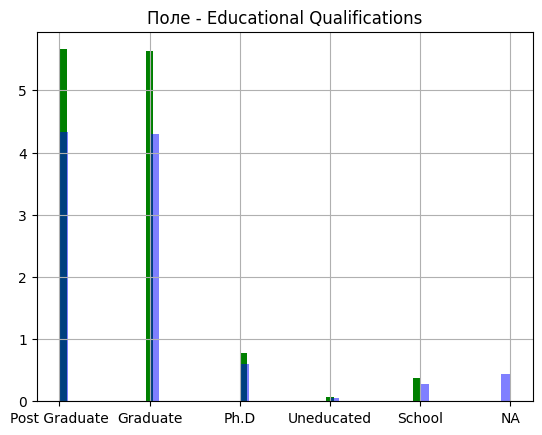

In [73]:
plot_hist_diff(df, df_cat_na, cat_cols[:1])

# Задача №31
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).

In [140]:
# !pip install mlxtend

In [152]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Инициализация простого классификатора из scikit-learn

In [153]:
knn = KNeighborsClassifier(n_neighbors=5)

Выделим X и y

In [154]:
df = pd.read_csv('onlinefoods.csv')
# X, y = df[num_cols], df[cat_cols[0]]
X, y = df[num_cols].values, df[cat_cols[0]].replace(dict(zip(df[cat_cols[0]].unique(), range(len(df[cat_cols[0]].unique()))))).values

Мы начинаем с выбора «лучших» 5 признаков из набора данных onlinefoods с помощью sequential forward selection (SFS). Здесь мы устанавливаем forward=True and floating=False. Выбирая cv=0, Мы не выполняем кросс-проверку, поэтому accuracy вычисляется полностью на обучающей выборке.

In [155]:
sfs1 = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)


[2024-03-29 01:06:39] Features: 1/5 -- score: 0.6391752577319587
[2024-03-29 01:06:39] Features: 2/5 -- score: 0.7242268041237113
[2024-03-29 01:06:39] Features: 3/5 -- score: 0.7551546391752577
[2024-03-29 01:06:39] Features: 4/5 -- score: 0.7371134020618557
[2024-03-29 01:06:40] Features: 5/5 -- score: 0.729381443298969

С помощью subsets_ мы можем взглянуть на выбранные индексы признаков на каждом шаге:

In [156]:
sfs1.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.63917526]),
  'avg_score': 0.6391752577319587,
  'feature_names': ('2',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.7242268]),
  'avg_score': 0.7242268041237113,
  'feature_names': ('0', '2')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.75515464]),
  'avg_score': 0.7551546391752577,
  'feature_names': ('0', '1', '2')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.7371134]),
  'avg_score': 0.7371134020618557,
  'feature_names': ('0', '1', '2', '3')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.72938144]),
  'avg_score': 0.729381443298969,
  'feature_names': ('0', '1', '2', '3', '4')}}

Кроме того, мы можем получить доступ к индексам 5 лучших функций непосредственно через k_feature_idx_ attribute:

In [157]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4)

Наконец, к оценке прогнозирования для 5 функций можно получить доступ через

In [158]:
sfs1.k_score_

0.729381443298969

In [159]:
sfs1 = sfs1.fit(df[num_cols], y)

print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

Best accuracy score: 0.73
Best subset (indices): (0, 1, 2, 3, 4)
Best subset (corresponding names): ('Age', 'Family size', 'latitude', 'longitude', 'Pin code')



[2024-03-29 01:06:48] Features: 1/5 -- score: 0.6391752577319587
[2024-03-29 01:06:48] Features: 2/5 -- score: 0.7242268041237113
[2024-03-29 01:06:48] Features: 3/5 -- score: 0.7551546391752577
[2024-03-29 01:06:48] Features: 4/5 -- score: 0.7371134020618557
[2024-03-29 01:06:48] Features: 5/5 -- score: 0.729381443298969